# bouncing_ball - Example 3

From the example [Simulation of a Bouncing Ball](https://www.mathworks.com/help/simulink/slref/simulation-of-a-bouncing-ball.html) from the Mathworks *creators of Matlab and Simulink software, accelerating the pace of engineering and science*.

![](bouncing_ball.png)

### Python Setup

In [7]:
import ctypes
from rtwtypes import *
import pandas as pd
import os
dll_path = os.path.abspath('bouncing_ball_win64.dll')
dll = ctypes.windll.LoadLibrary(dll_path)
# Model entry point functions
model_initialize = dll.bouncing_ball_initialize
model_step = dll.bouncing_ball_step
model_terminate = dll.bouncing_ball_terminate

# Model Signals
ball_position = real32_T.in_dll(dll,  "ball_position")
ball_velocity = real32_T.in_dll(dll,  "ball_velocity")
SimTime = real_T.in_dll(dll,  "SimTime")
# Model Parameters
coefficient_of_restitution = real32_T.in_dll(dll,  "coefficient_of_restitution")
gravitational_constant = real32_T.in_dll(dll,  "gravitational_constant")

# Running The Model.

Run the model and store the step, input, output and simulation time to a pandas dataframe.

<AxesSubplot:xlabel='time'>

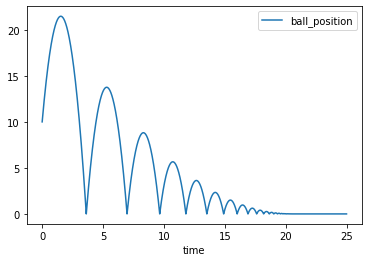

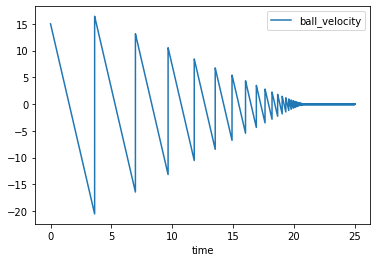

In [10]:
model_initialize();
rows = list()
for step in range(int(25*1e3)):
    model_step()
    row_tmp = {
    'time': float(SimTime.value),
    'ball_position': float(ball_position.value),
    'ball_velocity': float(ball_velocity.value)
    }
    rows.append(row_tmp)

df = pd.DataFrame(rows)

df.plot(x="time", y=["ball_position"])
df.plot(x="time", y=["ball_velocity"])

![](sldemo_bounceExample_02.png)

# Testing Bouncing Balls with different gravity.

<AxesSubplot:xlabel='time'>

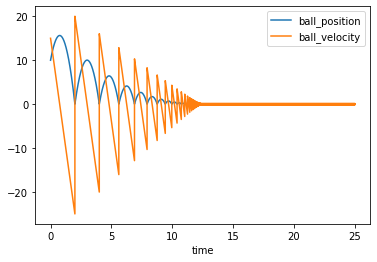

In [11]:
model_initialize();
rows = list()
gravitational_constant.value=-20
for step in range(int(25*1e3)):
    model_step()
    row_tmp = {
    'time': float(SimTime.value),
    'ball_position': float(ball_position.value),
    'ball_velocity': float(ball_velocity.value)
    }
    rows.append(row_tmp)

df = pd.DataFrame(rows)

df.plot(x="time", y=["ball_position", "ball_velocity"])

<AxesSubplot:xlabel='time'>

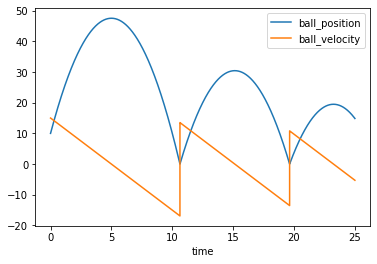

In [12]:
model_initialize();
rows = list()
gravitational_constant.value=-3
for step in range(int(25*1e3)):
    model_step()
    row_tmp = {
    'time': float(SimTime.value),
    'ball_position': float(ball_position.value),
    'ball_velocity': float(ball_velocity.value)
    }
    rows.append(row_tmp)

df = pd.DataFrame(rows)

df.plot(x="time", y=["ball_position", "ball_velocity"])